<a href="https://colab.research.google.com/github/msudhanshu10/Complete-Data-Science/blob/master/Hyperparameter_optimization_for_XgBoost_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hyperparameter Optimization is very important task, because it will help in selection of the right parameters for the algorithm.


In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded= files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [17]:
df= pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

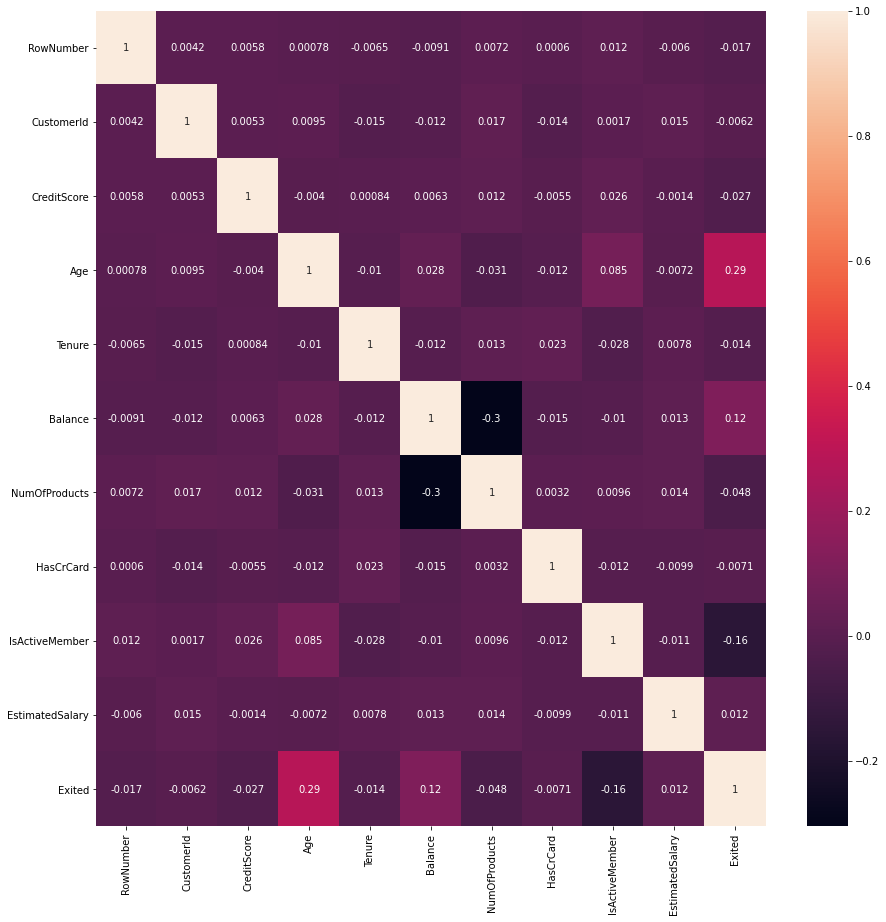

In [19]:
corr_matrix= df.corr()
top_corr_index= corr_matrix.index
plt.figure(figsize=(15,15))
sns.heatmap(df[top_corr_index].corr(), annot=True )

In [26]:
X= df.iloc[:, 3:13]
y= df.iloc[:, 13]

In [27]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [22]:
X.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
dtype: int64

In [28]:
geography= pd.get_dummies(X['Geography'], drop_first=True)
Gender=pd.get_dummies(X['Gender'], drop_first=True)

In [ ]:
geography.head()

In [24]:
Gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [29]:
X.drop(['Gender', 'Geography'], axis=1, inplace=True)

X= pd.concat([X, Gender, geography], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [31]:
params= {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
         'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
         'min_child_wgt':[1, 3, 5, 7],
         'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
         'colsample_bytree':[0.3, 0.4, 0.5, 0.7]}



In [32]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [35]:
def timer(start_time=None):
  if not start_time:
    start_time= datetime.now()
    return start_time
  elif start_time:
    thour, temp_sec= divmod((datetime.now()- start_time).total_seconds(), 3600)
    tmin, tsec= divmod(temp_sec, 60)
    print('\n Time taken: %hours %i minutes % seconds.' %(thour, tmin, round(tsec, 2)))

In [36]:
classifier= xgboost.XGBClassifier()

In [37]:
random_search= RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)


In [41]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   14.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [42]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_child_wgt=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [43]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.4,
 'learning_rate': 0.15,
 'max_depth': 5,
 'min_child_wgt': 1}

In [44]:
classifier= xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_child_wgt=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
score= cross_val_score(classifier, X, y, cv=10)
score.mean()

0.8656